In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter as fsf 
from ultra.visuals import make_matplotlib_pretty_again 
import ultra.visuals as v
from scipy.stats import skewnorm
import numpy as np 
import math as m
import vice 

In [2]:
peak = 12 
std = 1 
def gaussian_generator(peak, std, norm): 
    def gaussian(t): 
        return norm/(std * m.sqrt(2 * m.pi)) * m.exp(-(t - peak)**2 / (2 * std**2)) 
    return gaussian 

In [3]:
vice.yields.ccsne.settings["o"] = 0.015 
vice.yields.ccsne.settings["fe"] = 0.0012 
vice.yields.ccsne.settings["sr"] = 3.5e-8 
vice.yields.sneia.settings["o"] = 0 
vice.yields.sneia.settings["fe"] = 0.0017 
vice.yields.sneia.settings["sr"] = 0 

In [4]:
sz = vice.singlezone() 
sz.name = "isner19"
sz.func = lambda t: 10 * t / 4 if t < 4 else 10 * m.exp(-(t - 4) / 5) + gaussian_generator(12, 1, 15)(t)
sz.mode = "sfr" 
sz.dt = 0.01 
sz.bins = np.linspace(-3, 1, 401)
sz.schmidt = True 
out = sz.run(np.linspace(0, 14, 1401), capture = True, overwrite = True) 

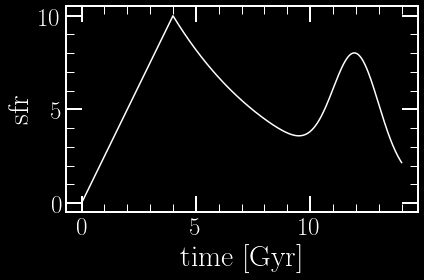

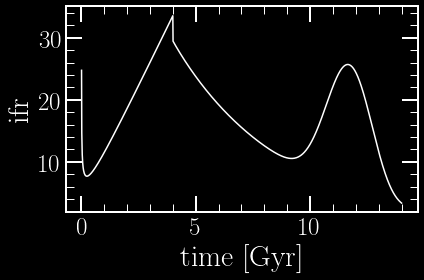

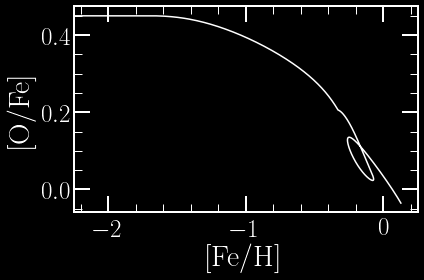

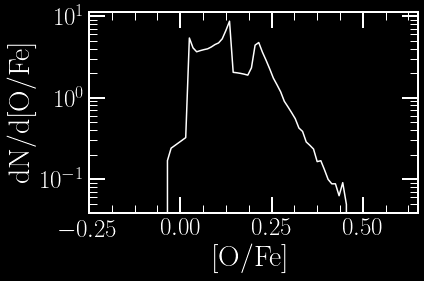

In [5]:
%matplotlib inline 
out.show("sfr") 
out.show("ifr")
out.show("[O/Fe]-[Fe/H]", xlim = [-2.25, 0.25])  
out.show("dN/d[O/Fe]", xlim = [-0.25, 0.65]) 

In [6]:
sz = vice.singlezone() 
sz.name = "isner19_infall" 
sz.func = lambda t: 10 * t**2 * m.exp(-t / 2.2) + gaussian_generator(12, 1, 60)(t) 
sz.bins = np.linspace(-3, 1, 401) 
sz.Mg0 = 0 
sz.schmidt = True 
out = sz.run(np.linspace(0, 14, 1401), capture = True, overwrite = True) 

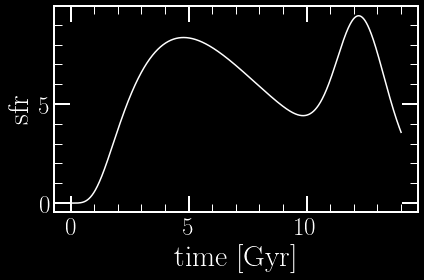

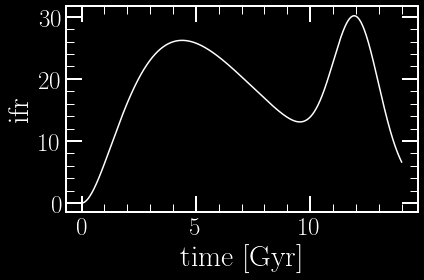

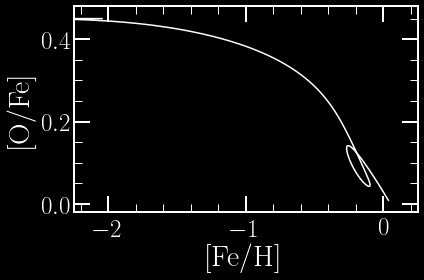

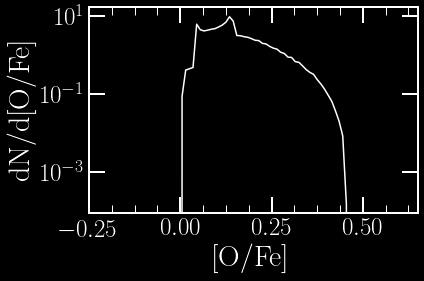

In [7]:
out.show("sfr") 
out.show("ifr")
out.show("[O/Fe]-[Fe/H]", xlim = [-2.25, 0.25])  
out.show("dN/d[O/Fe]", xlim = [-0.25, 0.65]) 

In [8]:
sz = vice.singlezone() 
sz.name = "const_comparison" 
sz.func = lambda t: 5 + gaussian_generator(12, 1, 15)(t) 
sz.mode = "sfr" 
sz.bins = np.linspace(-3, 1, 401) 
sz.schmidt = True 
out = sz.run(np.linspace(0, 14, 1401), capture = True)

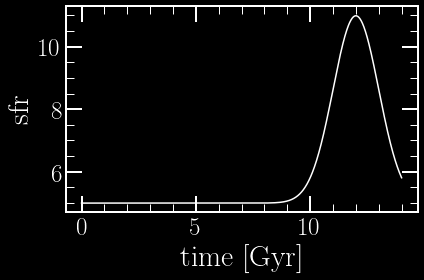

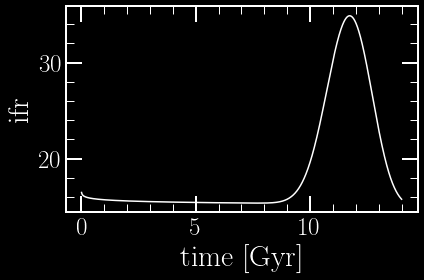

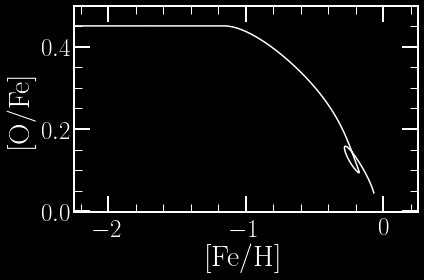

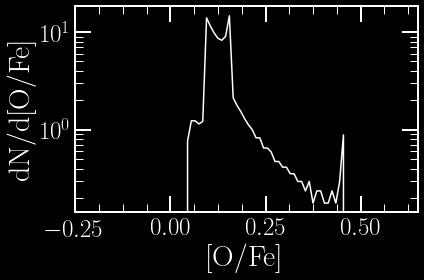

In [9]:
out.show("sfr") 
out.show("ifr") 
out.show("[O/Fe]-[Fe/H]", xlim = [-2.25, 0.25]) 
out.show("dN/d[O/Fe]", xlim = [-0.25, 0.65]) 

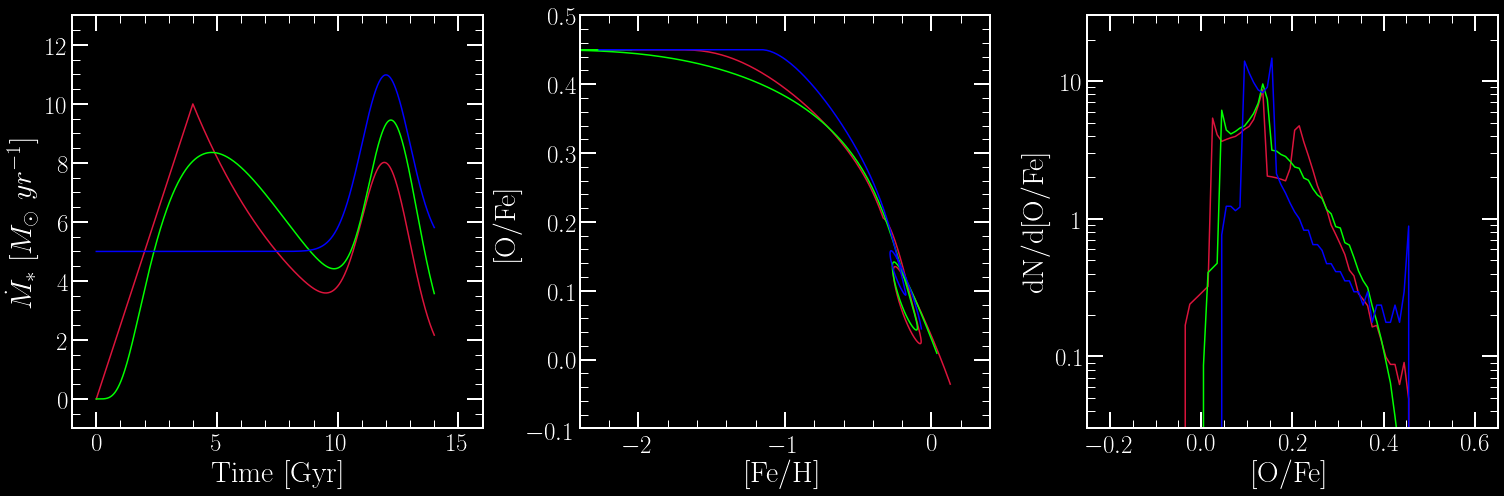

In [11]:
fig = plt.figure(figsize = (21, 7)) 
axes = 3 * [None] 
for i in range(len(axes)): 
    axes[i] = fig.add_subplot(131 + i, facecolor = "black") 
axes[0].set_xlabel("Time [Gyr]") 
axes[0].set_ylabel(r"$\dot{M}_*\ [M_\odot\ yr^{-1}]$") 
axes[1].set_xlabel("[Fe/H]") 
axes[1].set_ylabel("[O/Fe]") 
axes[2].set_xlabel("[O/Fe]") 
axes[2].set_ylabel("dN/d[O/Fe]") 
axes[2].set_yscale("log") 
axes[0].set_xlim([-1, 16]) 
axes[0].set_ylim([-1, 13]) 
axes[1].set_xlim([-2.4, 0.4]) 
axes[1].set_ylim([-0.1, 0.5]) 
axes[2].set_xlim([-0.25, 0.65]) 
axes[2].set_ylim([3e-2, 30]) 
outputs = [vice.output(i) for i in ["isner19", "isner19_infall", "const_comparison"]] 
colors = ["crimson", "lime", "blue"] 
for i in range(len(outputs)): 
    axes[0].plot(outputs[i].history["time"], outputs[i].history["sfr"], c = v.colors()[colors[i]]) 
    axes[1].plot(outputs[i].history["[Fe/H]"], outputs[i].history["[O/Fe]"], c = v.colors()[colors[i]]) 
    axes[2].plot(list(map(lambda x, y: (x + y) / 2, 
        outputs[i].mdf["bin_edge_left"], outputs[i].mdf["bin_edge_right"])), 
        outputs[i].mdf["dN/d[O/Fe]"], c = v.colors()[colors[i]]) 
plt.tight_layout()
axes[2].yaxis.set_major_formatter(fsf("%g")) 
plt.savefig("isner19.pdf") 